# 三、数据格式转换

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

## 1.载入数据与预览

In [9]:
df_overall = pd.read_csv('处理后数据/overall_data_with_lag_舞弊.csv')
# "C:\Users\Administrator\Documents\lx\毕马威智动审计\提交材料\舞弊-代码&数据\舞弊-数据\处理后数据\overall_data_with_lag_舞弊.csv"

In [10]:
print(df_overall.shape)
print(type(df_overall))

(51453, 331)
<class 'pandas.core.frame.DataFrame'>


## 2.提取特征与标签

In [11]:
# 特征值
x = df_overall.drop(columns=['股票代码', '截止日期', '是否舞弊'])
x

,Unnamed: 0,yb0_流动资产比率,yb0_现金资产比率,yb0_应收类资产比率,yb0_非流动资产比率,yb0_固定资产比率,yb0_有形资产比率,yb0_流动负债比率,yb0_母公司所有者权益占比,yb0_流转税率,...,is_4上市公司透明度,is_5上市公司透明度,is_0产权性质,is_1产权性质,is_2产权性质,is_3产权性质,is_0两职合一,is_1两职合一,is_2两职合一,is_3两职合一
0,0,0.000000,0.037914,-1.182930,0.000000,-1.213414,0.726960,0.000000,0.049472,2.025951,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,0.000000,-0.072446,-1.221704,0.000000,-1.215430,0.726757,0.000000,0.049472,1.489412,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.000000,-0.182368,-1.219468,0.000000,-1.226594,0.725216,0.000000,0.049472,1.219076,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.000000,-0.241782,-1.219137,0.000000,-1.206523,0.726679,0.000000,0.049472,1.428377,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.000000,-0.219826,-1.211280,0.000000,-1.237133,0.728265,0.000000,0.049472,1.422232,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51448,52149,-1.732017,-0.300388,-0.452575,1.755952,1.735081,0.655000,-3.541307,0.047836,-0.284031,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51449,52150,-1.695616,-0.352711,0.007681,1.719372,1.575309,0.657127,-3.532186,0.047969,-0.279220,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51450,52151,-1.573183,-0.351197,0.264259,1.596339,1.367451,0.658330,-3.293265,0.047963,-0.255561,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51451,52152,-1.493822,-0.402441,0.521391,1.516589,1.196635,0.660839,-3.597273,0.047936,-0.232673,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# 标签值
y = df_overall.loc[:, '是否舞弊']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
51448    0.0
51449    0.0
51450    0.0
51451    0.0
51452    0.0
Name: 是否舞弊, Length: 51453, dtype: float64

## 3.过采样处理

In [13]:
smo = SMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(x, y)

In [14]:
print(Counter(y_smo))

Counter({0.0: 50509, 1.0: 50509})


## 4.样本划分

In [15]:
seed = 5
x_train, x_test, y_train, y_test = train_test_split(x_smo, y_smo, test_size=0.25, random_state=seed)

In [16]:
print(f'训练集维度： {x_train.shape}，训练集数据类型： {type(x_train)}')
print(f'测试集维度： {x_test.shape}，测试集数据类型： {type(x_test)}')

训练集维度： (75763, 328)，训练集数据类型： <class 'pandas.core.frame.DataFrame'>
测试集维度： (25255, 328)，测试集数据类型： <class 'pandas.core.frame.DataFrame'>


## 5.格式转换

In [17]:
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [18]:
x_train

<tf.Tensor: shape=(75763, 328), dtype=float64, numpy=
array([[ 9.00400000e+03,  5.51502774e-01, -1.92298692e-01, ...,
         3.39942041e-01,  6.60057959e-01,  0.00000000e+00],
       [ 1.74300000e+04, -8.19179142e-01, -3.89919007e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.85600000e+03,  3.46447087e-01, -1.93956154e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.07920000e+04,  7.01177479e-01,  2.21556207e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.89090000e+04, -5.68224252e-01, -2.49491789e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.62010000e+04,  6.81095672e-01,  1.57755758e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])>

# 四、机器学习

## 1.网络架构（未调参）

In [19]:
# 验证集：前10000条数据    训练集：10001~25000条数据
x_val = x_train[:10000]  
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
partial_x_train.shape

TensorShape([65763, 328])

In [21]:
type(partial_x_train)

tensorflow.python.framework.ops.EagerTensor

In [22]:
print(len(partial_x_train))
print(len(partial_y_train))

65763
65763


In [90]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [91]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [92]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,            # 训练轮次
                    batch_size=256,    # 训练批量
                    validation_data=(x_val, y_val))

Epoch 1/70
514/514 [==============================] - 1s 1ms/step - loss: 61.3615 - accuracy: 0.5093 - val_loss: 60.7466 - val_accuracy: 0.5093
Epoch 2/70
514/514 [==============================] - 1s 1ms/step - loss: 30.6770 - accuracy: 0.5278 - val_loss: 2.6205 - val_accuracy: 0.5738
Epoch 3/70
514/514 [==============================] - 1s 1ms/step - loss: 13.0563 - accuracy: 0.5422 - val_loss: 8.3515 - val_accuracy: 0.5378
Epoch 4/70
514/514 [==============================] - 1s 1ms/step - loss: 6.7553 - accuracy: 0.5467 - val_loss: 4.4929 - val_accuracy: 0.5608
Epoch 5/70
514/514 [==============================] - 1s 1ms/step - loss: 4.6955 - accuracy: 0.5571 - val_loss: 0.6150 - val_accuracy: 0.6708
Epoch 6/70
514/514 [==============================] - 1s 1ms/step - loss: 2.2232 - accuracy: 0.5598 - val_loss: 1.1399 - val_accuracy: 0.5635
Epoch 7/70
514/514 [==============================] - 1s 1ms/step - loss: 1.0987 - accuracy: 0.6008 - val_loss: 4.0777 - val_accuracy: 0.5056
Ep

## 2.模型调参

### 参数范围：
- batch_size：256,128,64,32,16
- epochs：20,50,100,150
- drop：0.1,0.2,0.5

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.01),
    layers.Dense(1, activation="sigmoid")
])

In [24]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 200,            # 训练轮次
                    batch_size = 64,       # 训练批量
                    validation_data=(x_val, y_val))

Epoch 1/200
1028/1028 [==============================] - 2s 1ms/step - loss: 56.9608 - accuracy: 0.5123 - val_loss: 33.5701 - val_accuracy: 0.5136
Epoch 2/200
1028/1028 [==============================] - 1s 1ms/step - loss: 7.2178 - accuracy: 0.5351 - val_loss: 13.4001 - val_accuracy: 0.5030
Epoch 3/200
1028/1028 [==============================] - 1s 1ms/step - loss: 0.9916 - accuracy: 0.5489 - val_loss: 0.6554 - val_accuracy: 0.5465
Epoch 4/200
1028/1028 [==============================] - 1s 1ms/step - loss: 0.9776 - accuracy: 0.5632 - val_loss: 0.6723 - val_accuracy: 0.5326
Epoch 5/200
1028/1028 [==============================] - 1s 1ms/step - loss: 0.9199 - accuracy: 0.5669 - val_loss: 0.6418 - val_accuracy: 0.6231
Epoch 6/200
1028/1028 [==============================] - 2s 2ms/step - loss: 0.9722 - accuracy: 0.6099 - val_loss: 0.6309 - val_accuracy: 0.6575
Epoch 7/200
1028/1028 [==============================] - 1s 1ms/step - loss: 0.8701 - accuracy: 0.6234 - val_loss: 7.3079 - val

In [84]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Loss

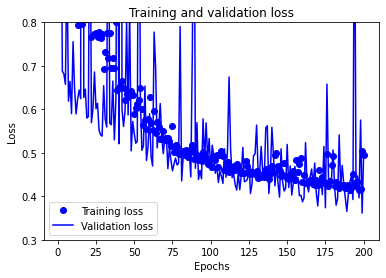

In [85]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0.3,0.8)
plt.legend()
plt.show()

### Accuracy

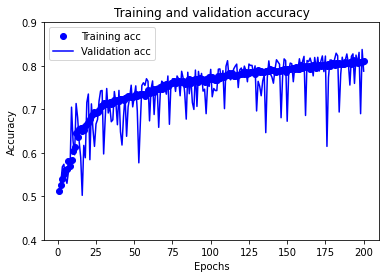

In [86]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.4,0.9)
plt.legend()
plt.show()

## 3.模型评估

In [26]:
model.evaluate(x_test, y_test)

790/790 [==============================] - 0s 602us/step - loss: 0.3859 - accuracy: 0.8306


[0.3859237730503082, 0.8306077718734741]

- loss =  0.3859237730503082
- accuracy = 0.3859237730503082

## 3.模型预测

### 舞弊判断接口

In [12]:
stock_code =  int(input('请输入公司的股票代码:'))
end_year = int(input('请输入想要预测的年份:'))

请输入公司的股票代码: 1
请输入想要预测的年份: 2010


In [59]:
df_overall

,Unnamed: 0,股票代码,截止日期,yb0_流动资产比率,yb0_现金资产比率,yb0_应收类资产比率,yb0_非流动资产比率,yb0_固定资产比率,yb0_有形资产比率,yb0_流动负债比率,...,is_5上市公司透明度,is_0产权性质,is_1产权性质,is_2产权性质,is_3产权性质,is_0两职合一,is_1两职合一,is_2两职合一,is_3两职合一,是否舞弊
0,0,1,2001,0.000000,0.037914,-1.182930,0.000000,-1.213414,0.726960,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,2002,0.000000,-0.072446,-1.221704,0.000000,-1.215430,0.726757,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,2003,0.000000,-0.182368,-1.219468,0.000000,-1.226594,0.725216,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1,2004,0.000000,-0.241782,-1.219137,0.000000,-1.206523,0.726679,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1,2005,0.000000,-0.219826,-1.211280,0.000000,-1.237133,0.728265,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51448,52149,900957,2017,-1.732017,-0.300388,-0.452575,1.755952,1.735081,0.655000,-3.541307,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51449,52150,900957,2018,-1.695616,-0.352711,0.007681,1.719372,1.575309,0.657127,-3.532186,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51450,52151,900957,2019,-1.573183,-0.351197,0.264259,1.596339,1.367451,0.658330,-3.293265,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51451,52152,900957,2020,-1.493822,-0.402441,0.521391,1.516589,1.196635,0.660839,-3.597273,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
partial_x_test = df_overall[(df_overall['股票代码'] ==  stock_code) & (df_overall['截止日期'] == end_year)].drop(columns=['股票代码', '截止日期', '是否舞弊'])
partial_x_test

,yb0_流动资产比率,yb0_现金资产比率,yb0_应收类资产比率,yb0_非流动资产比率,yb0_固定资产比率,yb0_有形资产比率,yb0_流动负债比率,yb0_母公司所有者权益占比,yb0_流转税率,yb0_综合税率A,...,is_4上市公司透明度,is_5上市公司透明度,is_0产权性质,is_1产权性质,is_2产权性质,is_3产权性质,is_0两职合一,is_1两职合一,is_2两职合一,is_3两职合一
9,0.0,-0.196479,-0.816747,0.0,-1.278814,0.727342,0.0,0.049472,1.120626,0.583929,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
partial_x_test = tf.convert_to_tensor(partial_x_test)
partial_x_test

In [53]:
model.predict(partial_x_test)

ValueError: Expect x to be a non-empty array or dataset.